### Importing Necessary Libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']
ratings_df = pd.read_csv('../../data/movies_grouplens/ratings.dat', sep='::', engine='python', names=columns)
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [22]:
ratings_df['Timestamp'] = pd.to_datetime(ratings_df['Timestamp'], unit='s')
ratings_df['Year'] = ratings_df['Timestamp'].dt.year
ratings_df['Month'] = ratings_df['Timestamp'].dt.month
# ratings_df['Day'] = ratings_df['Timestamp'].dt.day
# ratings_df['Hour'] = ratings_df['Timestamp'].dt.hour
# ratings_df['Minute'] = ratings_df['Timestamp'].dt.minute
# ratings_df['Second'] = ratings_df['Timestamp'].dt.second

ratings_df.head()


,UserID,MovieID,Rating,Timestamp,Year,Month
0,1,1193,5,2000-12-31 22:12:40,2000,12
1,1,661,3,2000-12-31 22:35:09,2000,12
2,1,914,3,2000-12-31 22:32:48,2000,12
3,1,3408,4,2000-12-31 22:04:35,2000,12
4,1,2355,5,2001-01-06 23:38:11,2001,1


### Basic Data Overview

In [23]:
ratings_df.info()
ratings_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   UserID     1000209 non-null  int64         
 1   MovieID    1000209 non-null  int64         
 2   Rating     1000209 non-null  int64         
 3   Timestamp  1000209 non-null  datetime64[ns]
 4   Year       1000209 non-null  int32         
 5   Month      1000209 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(3)
memory usage: 38.2 MB


,UserID,MovieID,Rating,Timestamp,Year,Month
count,1.000209e+06,1.000209e+06,1.000209e+06,1000209,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,2000-10-22 19:41:35.404665856,2.000126e+03,8.710371e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,2000-04-25 23:05:32,2.000000e+03,1.000000e+00
25%,1.506000e+03,1.030000e+03,3.000000e+00,2000-08-03 11:37:17,2.000000e+03,7.000000e+00
50%,3.070000e+03,1.835000e+03,4.000000e+00,2000-10-31 18:46:46,2.000000e+03,9.000000e+00
75%,4.476000e+03,2.770000e+03,4.000000e+00,2000-11-26 06:42:19,2.000000e+03,1.100000e+01
max,6.040000e+03,3.952000e+03,5.000000e+00,2003-02-28 17:49:50,2.003000e+03,1.200000e+01
std,1.728413e+03,1.096041e+03,1.117102e+00,NaN,4.223923e-01,2.717470e+00


### Checking missing values

In [24]:
ratings_df.isnull().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
Year         0
Month        0
dtype: int64

### Visualisation of Data

### Distribution of Ratings

/var/folders/93/vg7zf65913d920q1n72wl9580000gn/T/ipykernel_32534/3784224757.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ratings_df, x='Rating', palette='coolwarm')


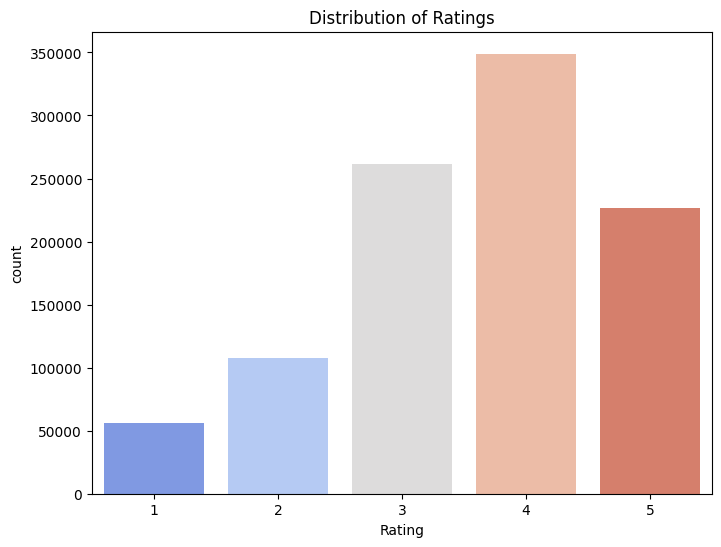

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ratings_df, x='Rating', palette='coolwarm')
plt.title('Distribution of Ratings')
plt.show()

### No. of ratings per user

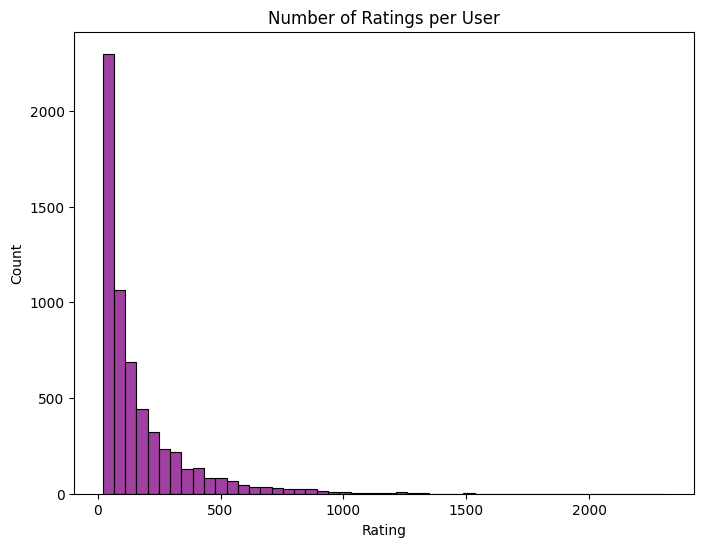

In [26]:
ratings_per_user = ratings_df.groupby('UserID')['Rating'].count()
plt.figure(figsize=(8, 6))
sns.histplot(ratings_per_user, bins=50, kde=False, color='purple')
plt.title('Number of Ratings per User')
plt.show()

### No. of ratings per movie

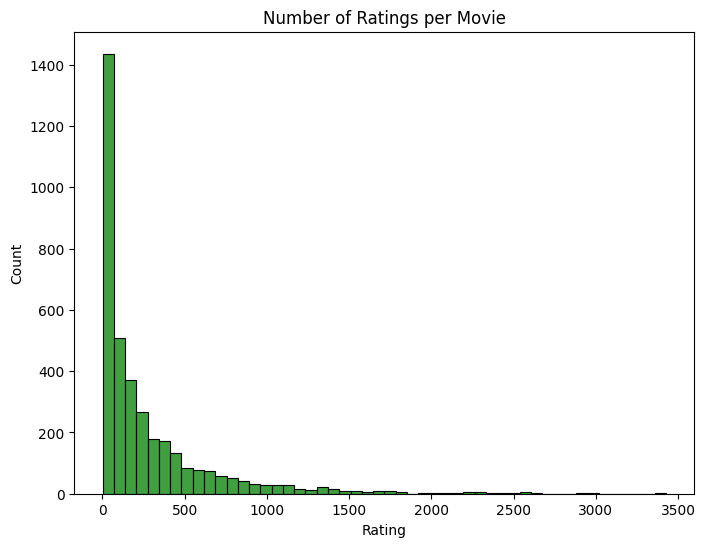

In [27]:
ratings_per_movie = ratings_df.groupby('MovieID')['Rating'].count()
plt.figure(figsize=(8, 6))
sns.histplot(ratings_per_movie, bins=50, kde=False, color='green')
plt.title('Number of Ratings per Movie')
plt.show()

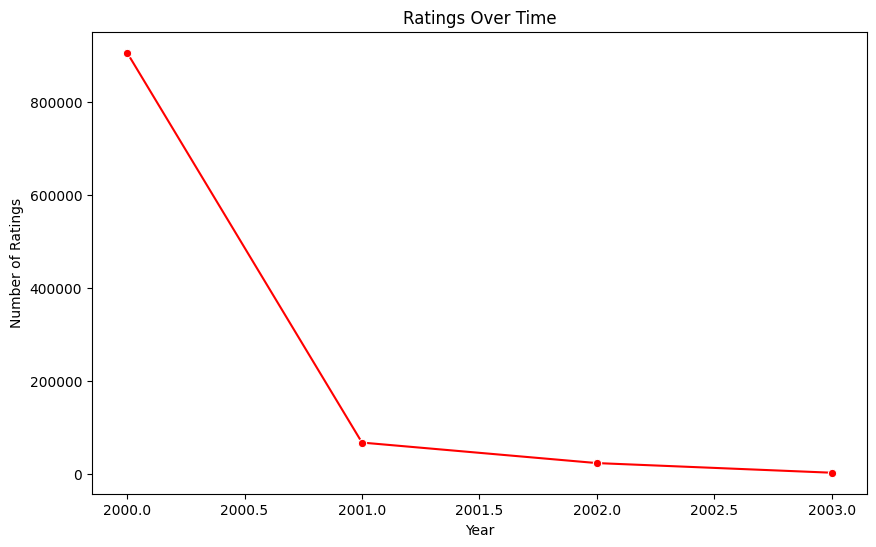

In [28]:
ratings_df['Year'] = ratings_df['Timestamp'].dt.year
ratings_over_time = ratings_df.groupby('Year')['Rating'].count()
plt.figure(figsize=(10, 6))
sns.lineplot(x=ratings_over_time.index, y=ratings_over_time.values, marker="o", color='red')
plt.title('Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.show()

### Dropping missing values(if any)

In [29]:
ratings_df = ratings_df.dropna()

### User and Movie Interaction Features

In [30]:
# Average rating given by each user
ratings_df['User_Avg_Rating'] =ratings_df.groupby('UserID')['Rating'].transform('mean')

# Average rating received by each movie
ratings_df['Movie_Avg_Rating'] =ratings_df.groupby('MovieID')['Rating'].transform('mean')

# Number of ratings given by each user
ratings_df['User_Rating_Count'] =ratings_df.groupby('UserID')['Rating'].transform('count')

# Number of ratings received by each movie
ratings_df['Movie_Rating_Count'] =ratings_df.groupby('MovieID')['Rating'].transform('count')

In [31]:
ratings_df

,UserID,MovieID,Rating,Timestamp,Year,Month,User_Avg_Rating,Movie_Avg_Rating,User_Rating_Count,Movie_Rating_Count
0,1,1193,5,2000-12-31 22:12:40,2000,12,4.188679,4.390725,53,1725
1,1,661,3,2000-12-31 22:35:09,2000,12,4.188679,3.464762,53,525
2,1,914,3,2000-12-31 22:32:48,2000,12,4.188679,4.154088,53,636
3,1,3408,4,2000-12-31 22:04:35,2000,12,4.188679,3.863878,53,1315
4,1,2355,5,2001-01-06 23:38:11,2001,1,4.188679,3.854375,53,1703
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,2000-04-26 02:35:41,2000,4,3.577713,2.793566,341,373
1000205,6040,1094,5,2000-04-25 23:21:27,2000,4,3.577713,3.731489,341,1229
1000206,6040,562,5,2000-04-25 23:19:06,2000,4,3.577713,3.799163,341,478
1000207,6040,1096,4,2000-04-26 02:20:48,2000,4,3.577713,3.976744,341,344
